# Python演習２
## 設計モデルの記述とモデルの特性

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

### 伝達関数モデルの記述

In [2]:
Np = [0, 1]      # 伝達関数の分子多項式の係数 (0*s + 1)
Dp = [1, 2, 3]   # 伝達関数の分母多項式の係数 (1*s^2 + 2*s + 3)
P = tf(Np, Dp)
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



In [3]:
P = tf([0, 1], [1, 2, 3])
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



### 伝達関数モデルのステップ応答

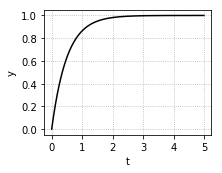

In [4]:
fig, ax = plt.subplots(figsize=(3, 2.3))

P = tf([0, 1], [0.5, 1])

y, t = step(P, np.arange(0, 5, 0.01))

ax.plot(t, y, color='k')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_xticks(np.linspace(0, 5, 6))
ax.grid(ls=':')

### 状態空間モデルの記述

In [5]:
A = [ [0, 1], [-1, -1] ]
B = [ [0], [1] ]
C = [ 1, 0 ]
D = [ 0 ]
P = ss(A, B, C, D)
print(P)

A = [[ 0.  1.]
 [-1. -1.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]



### 状態空間モデルのステップ応答

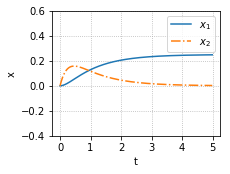

In [6]:
A = [[0, 1],[-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)

Td = np.arange(0, 5, 0.01)
x, t = step(P, Td) 

fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, x[:,0], label = '$x_1$')
ax.plot(t, x[:,1], ls = '-.', label = '$x_2$')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(-0.4, 0.6, 6))
ax.legend()
ax.grid(ls=':')

### 周波数応答
ゲイン線図と位相線図

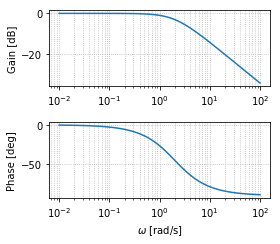

In [7]:
K = 1
T = 0.5

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

P = tf([0, K],[T, 1])
gain, phase, w = bode(P, logspace(-2,2), Plot=False)

ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()

### ブロック線図

In [8]:
S1 = tf( [0, 1], [1, 1])
S2 = tf( [1, 1], [1, 1, 1])
print(S1)
print(S2)


  1
-----
s + 1


   s + 1
-----------
s^2 + s + 1



直列結合

In [9]:
S = S2 * S1
print('S=', S)

S = series(S1, S2)
print('S=', S)

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1



分母分子の共通因子 s+1 が約分されない
この場合は，minreal を使う

In [10]:
S.minreal()


     1
-----------
s^2 + s + 1

並列結合

In [11]:
S = S1 + S2
print('S=', S)
S = parallel(S1, S2)
print('S=', S)

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1



フィードバック結合

In [12]:
S = feedback(S1*S2, 1)
print('S=', S)

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [13]:
print('S=', S.minreal())

S= 
     1
-----------
s^2 + s + 2



ポジティブフィードバックの場合

In [14]:
S = feedback(S1*S2, 1, sign = 1)
print(S.minreal())


   1
-------
s^2 + s



### 1次遅れ系のステップ応答

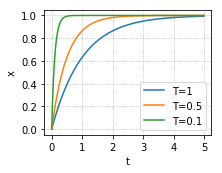

In [15]:
fig, ax = plt.subplots(figsize=(3, 2.3))

K = 1
T = (1, 0.5, 0.1)
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, label='T='+str(T[i]))

ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')

### 1次遅れ系の周波数応答

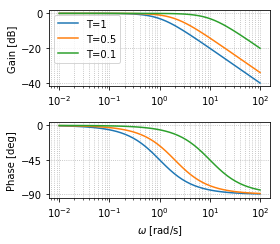

In [16]:
K = 1
T = (1, 0.5, 0.1)

fig, ax = plt.subplots(2,1,figsize=(4,3.5))

for i in range(len(T)):
    P = tf([0, K],[T[i], 1])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    ax[0].semilogx(w, 20*np.log10(gain), label='T='+str(T[i]))
    ax[1].semilogx(w, phase*180/np.pi, label='T='+str(T[i]))
 
ax[1].set_ylim(-95,5)
ax[1].set_yticks([-90,-45,0])
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[0].legend()

fig.tight_layout()

### 2次遅れ系のステップ応答

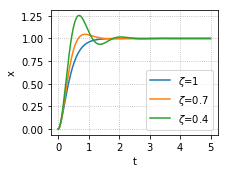

In [17]:
fig, ax = plt.subplots(figsize=(3, 2.3))

zeta = (1, 0.7, 0.4)
omega_n = 5
for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    ax.plot(t, y, label='$\zeta$='+str(zeta[i]))

ax.set_xticks(np.arange(0, 5.2, step=1.0))
ax.set_yticks(np.arange(0, 1.3, step=0.25))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')

### 2次遅れ系の周波数応答

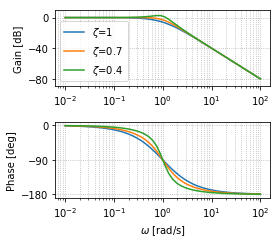

In [18]:
fig, ax = plt.subplots(2,1,figsize=(4,3.5))

zeta = (1, 0.7, 0.4)
omega_n = 1

for i in range(len(zeta)):
    P = tf([0,omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    gain, phase, w = bode(P, logspace(-2,2), Plot=False)
    
    ax[0].semilogx(w, 20*np.log10(gain), label='$\zeta$='+str(zeta[i]))
    ax[1].semilogx(w, phase*180/np.pi, label='$\zeta$='+str(zeta[i]))

ax[0].set_ylim(-90,10)
ax[0].set_yticks([-80,-40,0])
ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[0].legend()

fig.tight_layout()

### 1次遅れ系，2次遅れ系のナイキスト線図

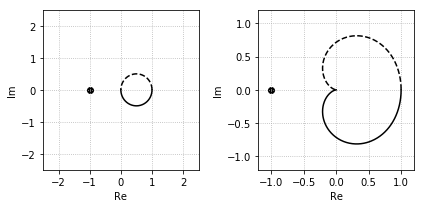

In [19]:
fig, ax = plt.subplots(1,2, figsize=(6, 3))

# １次遅れ系
P = tf([0, 1],[1, 1])
x, y, _ = nyquist(P, logspace(-3,5,1000), Plot=False)
ax[0].plot(x, y, color='k')
ax[0].plot(x, -y, ls='--', color='k')
ax[0].scatter(-1, 0, color='k')


# 2次遅れ系
P = tf([0, 1],[1, 1.4, 1])
x, y, _ = nyquist(P, logspace(-3,5,1000), Plot=False)
ax[1].plot(x, y, color='k')
ax[1].plot(x, -y, ls='--', color='k')
ax[1].scatter(-1, 0, color='k')

ax[0].set_xlim(-2.5, 2.5)
ax[0].set_ylim(-2.5, 2.5)
ax[0].grid(ls=':')
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')

ax[1].set_xlim(-1.2, 1.2)
ax[1].set_ylim(-1.2, 1.2)
ax[1].grid(ls=':')
ax[1].set_xlabel('Re')
ax[1].set_ylabel('Im')

fig.tight_layout()